# Info Set de Datos Bancarios

Este proyecto se centra en la detección de patrones de fraude en un dataset de transacciones bancarias sacado de [Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data). El dataset contiene alrededor de 2,500 transacciones, con 16 columnas que incluyen el monto de la transacción, el tipo de transferencia, la ubicación, la edad del cliente, entre otras.

ID_Transaccion = ID de la transaccion.

ID_Cuenta = ID de la cuenta bancaria.

Monto_Transaccion = El monto por el cual se hizo la transaccion.

Fecha_Transaccion = Fecha en la que se hizo la transaccion.

Tipo_Transaccion = Si fue debito o Credito.

Ubicacion = Ubicacion desde donde se hizo la transaccion.

ID_Dispositivo = ID del dispositivo desde el que se hizo la transaccion.

DireccionIP = Direccion IP desde donde se hizo la transaccion.

ID_Comerciante = ID del comercio donde se gasto plata.

Canal = De que modo se hizo el fraude, Branch(Sucursal), ATM(Cajero), Online(Transferencia Online)

Cliente_Edad = Edad del cliente

Ocupacion_Cliente = A que se dedica el cliente.

Duracion_Transaccion = Cuanto tiempo duro la transaccion.

Intentos_login = Cuantos intentos de login hubieron antes de la transaccion.

Dinero_Cuenta = Cuanta plata habia en la cuenta.

Ultima_Transaccion = Cuando habia sido la transaccion anterior a esta.



# Hipotesis



Hipotesis:

*  Cuanto mas alto es el monto de la transaccion, mas posible es que este vinculado a un fraude.
*  Cuantos mas intentos de inicio de sesion tenga la cuenta previos a la transaccion, mas propenso es a ser una transaccion fraudulenta
*  Los clientes jóvenes (menores de 24 años) o mayores (mayores de 55 años) tienen más probabilidades de ser víctimas de fraude.
*  Si el tiempo que se demora en hacer la transaccion esta fuera del promedio, ya sea muy rapido, o muy lento, es mas propenso a ser una transaccion fraudulenta.


# codigo

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 51.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [71]:
banco_data= pd.read_csv('/content/bank_transactions_data_2.csv')

In [72]:
banco_data.head(3)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04


In [ ]:
banco_data.tail()

,ID_Transaccion,ID_Cuenta,Monto_Transaccion,Fecha_Transaccion,Tipo_Transaccion,Ubicacion,ID_Dispositivo,DireccionIP,ID_Comerciante,Canal,Cliente_Edad,Ocupacion_Cliente,Duracion_Transaccion,Intentos_login,Dinero_Cuenta,Ultima_Transaccion
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


In [25]:
banco_data.shape

(2512, 17)

In [26]:
banco_data.columns

Index(['ID_Transaccion', 'ID_Cuenta', 'Monto_Transaccion', 'Fecha_Transaccion',
       'Tipo_Transaccion', 'Ubicacion', 'ID_Dispositivo', 'DireccionIP',
       'ID_Comerciante', 'Canal', 'Cliente_Edad', 'Ocupacion_Cliente',
       'Duracion_Transaccion', 'Intentos_login', 'Dinero_Cuenta',
       'Ultima_Transaccion', 'es_fraude'],
      dtype='object')

In [73]:
banco_data.rename(columns={'TransactionID':'ID_Transaccion', 'AccountID':'ID_Cuenta','TransactionAmount':'Monto_Transaccion','TransactionDate':'Fecha_Transaccion','TransactionType':'Tipo_Transaccion','Location':'Ubicacion','DeviceID':'ID_Dispositivo','IP Address':'DireccionIP','MerchantID':'ID_Comerciante','Channel':'Canal','CustomerAge':'Cliente_Edad','CustomerOccupation':'Ocupacion_Cliente','TransactionDuration':'Duracion_Transaccion','LoginAttempts':'Intentos_login','AccountBalance':'Dinero_Cuenta','PreviousTransactionDate':'Ultima_Transaccion'},inplace=True)

In [ ]:
banco_data.columns

Index(['ID_Transaccion', 'ID_Cuenta', 'Monto_Transaccion', 'Fecha_Transaccion',
       'Tipo_Transaccion', 'Ubicacion', 'ID_Dispositivo', 'DireccionIP',
       'ID_Comerciante', 'Canal', 'Cliente_Edad', 'Ocupacion_Cliente',
       'Duracion_Transaccion', 'Intentos_login', 'Dinero_Cuenta',
       'Ultima_Transaccion'],
      dtype='object')

In [74]:
banco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Transaccion        2512 non-null   object 
 1   ID_Cuenta             2512 non-null   object 
 2   Monto_Transaccion     2512 non-null   float64
 3   Fecha_Transaccion     2512 non-null   object 
 4   Tipo_Transaccion      2512 non-null   object 
 5   Ubicacion             2512 non-null   object 
 6   ID_Dispositivo        2512 non-null   object 
 7   DireccionIP           2512 non-null   object 
 8   ID_Comerciante        2512 non-null   object 
 9   Canal                 2512 non-null   object 
 10  Cliente_Edad          2512 non-null   int64  
 11  Ocupacion_Cliente     2512 non-null   object 
 12  Duracion_Transaccion  2512 non-null   int64  
 13  Intentos_login        2512 non-null   int64  
 14  Dinero_Cuenta         2512 non-null   float64
 15  Ultima_Transaccion   

In [ ]:
def nulos(banco_data):
  cant = len(banco_data)
  for col in banco_data.columns:
    print(col,':',round(banco_data[col].isnull().sum() * 100 / cant,2),'%')
nulos(banco_data)

ID_Transaccion : 0.0 %
ID_Cuenta : 0.0 %
Monto_Transaccion : 0.0 %
Fecha_Transaccion : 0.0 %
Tipo_Transaccion : 0.0 %
Ubicacion : 0.0 %
ID_Dispositivo : 0.0 %
DireccionIP : 0.0 %
ID_Comerciante : 0.0 %
Canal : 0.0 %
Cliente_Edad : 0.0 %
Ocupacion_Cliente : 0.0 %
Duracion_Transaccion : 0.0 %
Intentos_login : 0.0 %
Dinero_Cuenta : 0.0 %
Ultima_Transaccion : 0.0 %


In [ ]:
banco_data.duplicated().sum()

np.int64(0)

In [ ]:
banco_data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Monto_Transaccion,2512.0,298.0,292.0,0.0,82.0,211.0,415.0,1919.0
Cliente_Edad,2512.0,45.0,18.0,18.0,27.0,45.0,59.0,80.0
Duracion_Transaccion,2512.0,120.0,70.0,10.0,63.0,112.0,161.0,300.0
Intentos_login,2512.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
Dinero_Cuenta,2512.0,5114.0,3901.0,101.0,1504.0,4736.0,7679.0,14978.0


In [75]:
umbral_monto = 590
umbral_login = 3
umbral_duracionR = 50
umbral_duracionL = 190

banco_data['es_fraude'] = ((banco_data['Monto_Transaccion'] > umbral_monto) | (banco_data['Intentos_login'] >= umbral_login) | (banco_data['Duracion_Transaccion'] < umbral_duracionR ) |(banco_data['Duracion_Transaccion'] > umbral_duracionL )).astype(int)

In [76]:
def clasificar_edad(edad):
    if 0 <= edad <= 24 or edad >= 55:
        return '<=24 y >=55'
    elif 25 <= edad <= 54:
        return 'medio'

banco_data['Grupo_Edad'] = banco_data['Cliente_Edad'].apply(clasificar_edad)


In [ ]:
delitos = banco_data.query("Cliente_Edad == 73 and Canal == 'Online'")
print(delitos)

     ID_Transaccion ID_Cuenta  Monto_Transaccion    Fecha_Transaccion  \
745        TX000746   AC00110             319.17  2023-01-11 16:58:02   
856        TX000857   AC00298             112.94  2023-11-24 17:35:47   
969        TX000970   AC00280             388.10  2023-08-21 18:06:59   
1553       TX001554   AC00286              47.23  2023-08-03 18:18:56   
1615       TX001616   AC00030             363.84  2023-10-19 17:41:40   
1649       TX001650   AC00434              29.50  2023-07-20 18:26:11   
1902       TX001903   AC00336            1168.26  2023-06-12 16:25:21   
2310       TX002311   AC00243             176.52  2023-03-14 17:06:18   
2480       TX002481   AC00070              99.98  2023-03-30 16:52:05   

     Tipo_Transaccion     Ubicacion ID_Dispositivo      DireccionIP  \
745             Debit        Tucson        D000444     7.28.148.225   
856            Credit   San Antonio        D000265  142.160.124.244   
969            Credit   Los Angeles        D000653    10

In [39]:
banco_data['Fecha_Transaccion'] = pd.to_datetime(banco_data['Fecha_Transaccion'])

banco_data['Mes'] = banco_data['Fecha_Transaccion'].dt.month
banco_data['Año'] = banco_data['Fecha_Transaccion'].dt.year

print(banco_data[['Fecha_Transaccion','Mes', 'Año']])


       Fecha_Transaccion  Mes   Año
0    2023-04-11 16:29:14    4  2023
1    2023-06-27 16:44:19    6  2023
2    2023-07-10 18:16:08    7  2023
3    2023-05-05 16:32:11    5  2023
4    2023-10-16 17:51:24   10  2023
...                  ...  ...   ...
2507 2023-04-26 17:09:36    4  2023
2508 2023-03-22 17:36:48    3  2023
2509 2023-08-21 17:08:50    8  2023
2510 2023-02-24 16:24:46    2  2023
2511 2023-02-14 16:21:23    2  2023

[2512 rows x 3 columns]


In [82]:
banco_data.groupby(['Intentos_login', 'es_fraude']).size().reset_index(name='Conteo')

,Intentos_login,es_fraude,Conteo
0,1,0,1382
1,1,1,1008
2,2,0,13
3,2,1,14
4,3,1,31
5,4,1,32
6,5,1,32


In [83]:
banco_data['es_fraude'].value_counts()

,count
es_fraude,
0,1395
1,1117


In [84]:
banco_data['Canal'].value_counts()

,count
Canal,
Branch,868
ATM,833
Online,811


In [ ]:
banco_data['Tipo_Transaccion'].value_counts()

,count
Tipo_Transaccion,
Debit,1944
Credit,568


In [85]:
banco_data["Ocupacion_Cliente"].value_counts()

,count
Ocupacion_Cliente,
Student,657
Doctor,631
Engineer,625
Retired,599


In [86]:
PromEdad = int(banco_data['Cliente_Edad'].mean().round())
print(PromEdad)

45


In [41]:
paleta = {0:'green',1:'red'}

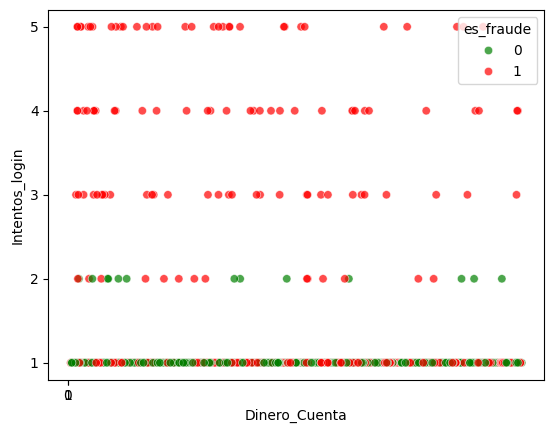

In [42]:
sns.scatterplot(data=banco_data,x='Dinero_Cuenta',y='Intentos_login', hue='es_fraude', palette=paleta, alpha=0.7)
plt.yticks([1,2,3,4,5])
plt.xticks([0, 1])
plt.show()

A medida de que los intentos de login iban subiendo, los casos de fraude aumentaban.

<Axes: xlabel='Monto_Transaccion', ylabel='Count'>

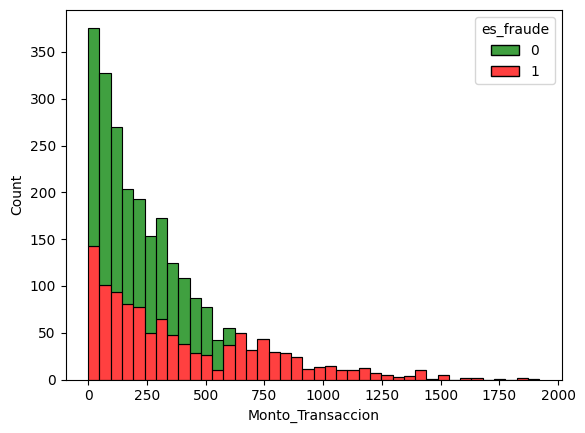

In [ ]:
sns.histplot(data=banco_data,x='Monto_Transaccion',hue='es_fraude',palette=paleta, multiple='stack')

A medida de que el monto de la transaccion aumentaba, menos transacciones legitimas se veian, esto nos quiere decir que cuanto mas elevada es la transaccion mas chances de que sea fraudulenta es.

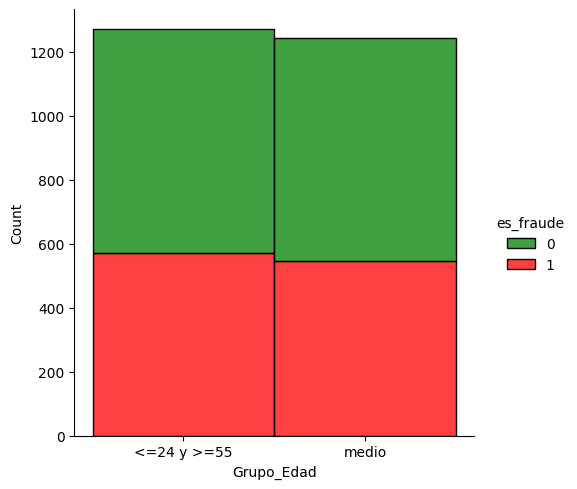

In [77]:
sns.displot(data=banco_data ,x='Grupo_Edad', hue='es_fraude',multiple='stack',palette=paleta)

Las personas menores de 24 y mayores de 55 son levemente mas perjudicadas por fraudes.

<Axes: xlabel='Duracion_Transaccion', ylabel='Monto_Transaccion'>

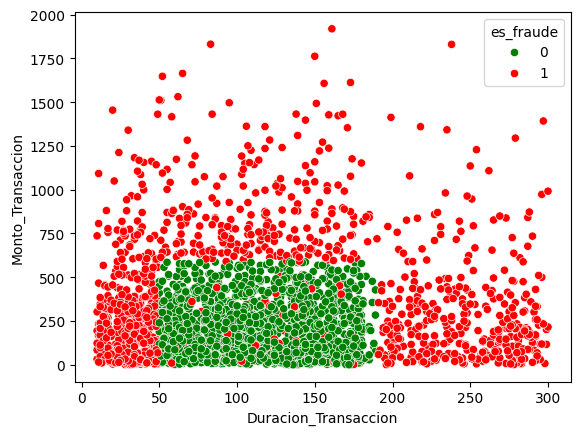

In [79]:
sns.scatterplot(data = banco_data, x='Duracion_Transaccion', y ='Monto_Transaccion', hue= 'es_fraude', palette=paleta)

Como podemos ver las transacciones que demoraron menos de 50 segundos, y mas de 180 son en su mayoria fraudes.